# Load Libraries/ Data

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [2]:
df = pd.read_excel('Data/student-performance-combined.xlsx', sheet_name='student-mat')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Set Visualization Style

In [56]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

# 1. Preprocess

In [5]:
X = df.drop(columns='G3')
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [6]:
cat_select = make_column_selector(dtype_include='object')
cat_select(X_train)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [7]:
num_select = make_column_selector(dtype_include='number')
num_select(X_train)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [8]:
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'), 
                        OneHotEncoder(drop='if_binary', sparse=False))
                         
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [9]:
preprocessor = make_column_transformer((cat_pipe, cat_select),
                                       (num_pipe, num_select),
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000028F7AB06160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000028F7ACAEB20>)],
                  verbose_feature_names_out=False)

In [10]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

In [11]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=feature_names, index=X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns=feature_names, index=X_test.index)

In [12]:
X_test_df.head(3)

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
58,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,15.0,1.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,1.0,5.0,2.0,9.0,10.0
338,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,18.0,3.0,3.0,1.0,4.0,0.0,5.0,3.0,3.0,1.0,1.0,1.0,7.0,16.0,15.0
291,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,17.0,4.0,3.0,1.0,3.0,0.0,4.0,2.0,2.0,1.0,2.0,3.0,0.0,15.0,15.0


In [13]:
y_test.head(3)

58      9
338    17
291    15
Name: G3, dtype: int64

# Custom Functions

In [37]:
def evaluate_regression(model, X_train=X_train_df,y_train=y_train, X_test=X_test_df, y_test=y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [15]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True, permutation=False, random_state=42,
                   X_train=X_train_df, y_train=y_train):
    
    r = permutation_importance(model, X_train, y_train, n_repeats =5, 
                                   random_state = random_state)
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
        
    if permutation==True:        
        importances = pd.Series(r['importances_mean'],index=X_train.columns,
                           name = 'permutation importance')
    
        # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [16]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=5):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [17]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [18]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [54]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')    

    
    if annotate == True:
            for bar in ax.patches:
                ## calculate center of bar
                bar_ax = bar.get_y() + bar.get_height() / 2
                ## get the value to annotate
                val = bar.get_width()

                # handle negative values by setting them to position 0
                if val < 0:
                    val_pos = 0
                else:
                    val_pos = val        
        
                # ha and va stand for the horizontal and vertical alignment
                ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                            ha=ha, va=va, size=size,
                            xytext=xytext, textcoords=textcoords)
    return ax

# 2. Fit a tree-based model

In [20]:
rf = RandomForestRegressor(random_state=SEED)

rf.fit(X_train_df, y_train)
evaluate_regression(rf)

Training Data:	R^2= 0.98	RMSE= 0.67
Test Data:	R^2= 0.92	RMSE= 1.21


In [21]:
importances_def = get_importances(rf, ascending=False, sort=True)
importances_def[0:5]

G2           0.765543
absences     0.123651
age          0.015467
health       0.008020
studytime    0.007784
Name: Feature Importance, dtype: float64

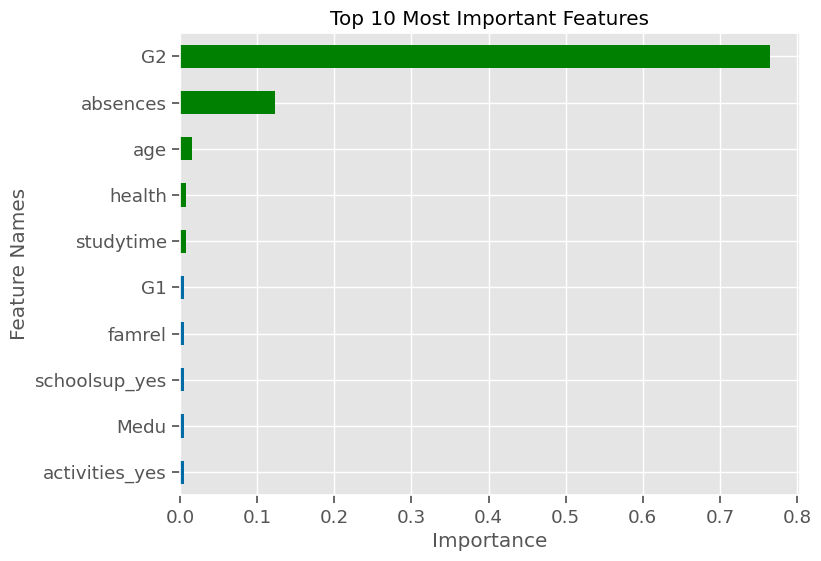

In [57]:
rf_default_color = get_color_dict(importances_def, top_n=5 )

plot_importance_color(importances_def, top_n=10, color_dict=rf_default_color);

## Default Top 5 Most Important Features

- 'G2'
- 'absences'
- 'age'
- 'health'
- 'studytime'

# 3. Permutation Importance with Same tree-based model

In [23]:
importances_perm = get_importances(rf, permutation=True, sort=True, ascending=False,
                                       X_train=X_train_df, y_train=y_train, random_state=SEED)
importances_perm[0:5]

G2           1.593234
absences     0.225382
age          0.022544
health       0.009639
studytime    0.006343
Name: permutation importance, dtype: float64

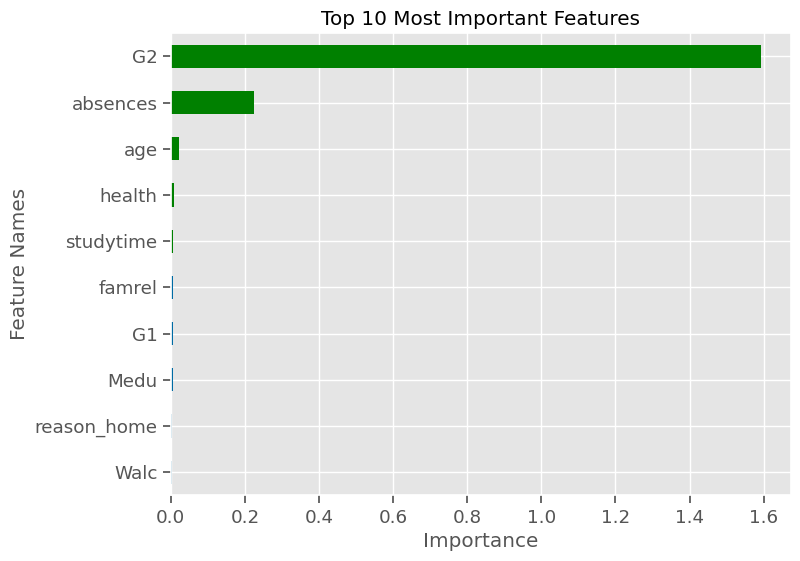

In [58]:
rf_perm_color = get_color_dict(importances_perm, top_n=5 )

plot_importance_color(importances_perm, top_n=10, color_dict=rf_perm_color);

## Permutation Top 5 Most Important Features
- 'G2'
- 'absences'
- 'age'
- 'health'
- 'studytime'

- **Permutation importances match Default importances**

# 4. LinearRegression Model (sklearn)

In [39]:
X = df.drop(columns='G3')
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

cat_select = make_column_selector(dtype_include='object')
cat_select(X_train)

num_select = make_column_selector(dtype_include='number')
num_select(X_train)

cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'), 
                        OneHotEncoder(drop='first', sparse=False))
                         
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer((cat_pipe, cat_select),
                                       (num_pipe, num_select),
                                       verbose_feature_names_out=False)

preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df2 = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=feature_names, index=X_train.index)

X_test_df2 = pd.DataFrame(preprocessor.transform(X_test), 
                          columns=feature_names, index=X_test.index)

In [40]:
linreg = LinearRegression()

linreg.fit(X_train_df, y_train)
evaluate_regression(linreg, X_train=X_train_df2, X_test=X_test_df2)

Training Data:	R^2= 0.85	RMSE= 1.83
Test Data:	R^2= 0.81	RMSE= 1.85


In [43]:
linreg_coeffs = get_coeffs_linreg(linreg, ascending=False)
linreg_coeffs

G2                   0.991225
higher_yes           0.823032
reason_other         0.391465
Pstatus_T            0.384430
school_MS            0.382554
schoolsup_yes        0.342220
guardian_other       0.327112
famrel               0.309943
reason_reputation    0.302836
Medu                 0.291554
guardian_mother      0.266733
Walc                 0.261778
Mjob_other           0.212923
traveltime           0.187384
Mjob_services        0.170276
paid_yes             0.158962
famsup_yes           0.155038
address_U            0.147255
G1                   0.140771
absences             0.053156
Fjob_health          0.051774
Mjob_health          0.030144
health               0.025090
freetime             0.019213
famsize_LE3          0.009353
sex_M               -0.005712
goout               -0.016042
internet_yes        -0.093732
failures            -0.100847
Mjob_teacher        -0.153467
Fedu                -0.178754
nursery_yes         -0.210628
Dalc                -0.212309
studytime 

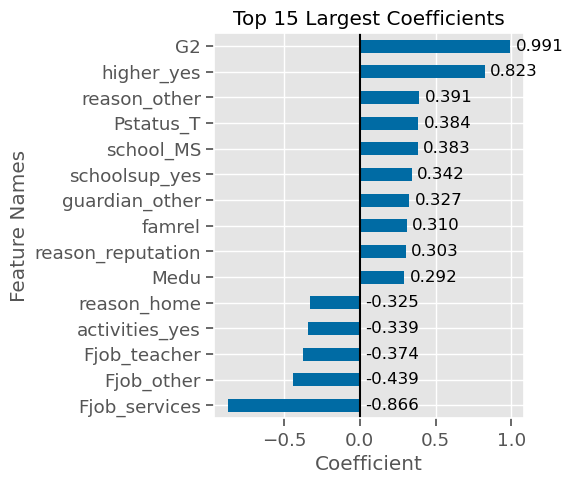

In [59]:
plot_coeffs(linreg_coeffs, top_n=15, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=True, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points');

## Three Largest Coefficient Interpretation

- 'G2':
    - An increase of 1 point of this feature, increases the target by 0.991 points
    
    
- 'higher_yes':
    - Intending to pursue higher education, increases the target by 0.823 points
    
    
- 'reason_other':
    - having 'other' as the reason for picking the school, increases the target by 0.391 points